In [1]:
#pip install scikit-learn --upgrade

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
from sklearn import set_config
set_config(transform_output="pandas")

# Exploring 1000 song dataset

In [39]:
df_1000 = pd.read_csv(r'df_audio_features_1000.csv')

In [40]:
df_1000 ['title'] = df_1000['name'] + ' - ' + df_1000['artist']

In [41]:
df_1000.set_index('title', inplace=True)

In [42]:
df_1000.drop(['type','id','html','name','artist','duration_ms'],axis=1, inplace=True)

In [57]:
df1000songs=df_1000.copy()
df1000songs.sample(5)

danceability  energy  key  \
title                                                                           
Also sprach Zarathustra, Op.30, TrV 176: Prelud...         0.115   0.301    0   
No Te Debí Besar - C. Tangana                              0.672   0.684    9   
My Funny Valentine - Miles Davis Quintet                   0.549   0.124    0   
Happy - Live/Remastered - Tasha Cobbs Leonard              0.401   0.885    7   
Jive Talkin' - From "Saturday Night Fever" Soun...         0.811   0.545    7   

                                                    loudness  mode  \
title                                                                
Also sprach Zarathustra, Op.30, TrV 176: Prelud...   -13.321     1   
No Te Debí Besar - C. Tangana                         -5.682     0   
My Funny Valentine - Miles Davis Quintet             -13.793     0   
Happy - Live/Remastered - Tasha Cobbs Leonard         -5.753     1   
Jive Talkin' - From "Saturday Night Fever" Soun...   -12.969     0   

                                                    speechiness  acousticness  \
title                                                                           
Also sprach Zarathustra, Op.30, TrV 176: Prelud...       0.0449         0.637   
No Te Debí Besar - C. Tangana                            0.3160         0.125   
My Funny Valentine - Miles Davis Quintet                 0.0397         0.938   
Happy - Live/Remastered - Tasha Cobbs Leonard            0.4450         0.172   
Jive Talkin' - From "Saturday Night Fever" Soun...       0.0579         0.155   

                                                    instrumentalness  \
title                                                                  
Also sprach Zarathustra, Op.30, TrV 176: Prelud...           0.93500   
No Te Debí Besar - C. Tangana                                0.02610   
My Funny Valentine - Miles Davis Quintet                     0.00175   
Happy - Live/Remastered - Tasha Cobbs Leonard                0.00000   
Jive Talkin' - From "Saturday Night Fever" Soun...           0.08530   

                                                    liveness  valence  \
title                                                                   
Also sprach Zarathustra, Op.30, TrV 176: Prelud...    0.1540   0.0409   
No Te Debí Besar - C. Tangana                         0.1830   0.6200   
My Funny Valentine - Miles Davis Quintet              0.1260   0.3200   
Happy - Live/Remastered - Tasha Cobbs Leonard         0.0992   0.4390   
Jive Talkin' - From "Saturday Night Fever" Soun...    0.1560   0.7340   

                                                      tempo  time_signature  
title                                                                        
Also sprach Zarathustra, Op.30, TrV 176: Prelud...   77.276               4  
No Te Debí Besar - C. Tangana                        75.233               3  
My Funny Valentine - Miles Davis Quintet             66.184               4  
Happy - Live/Remastered - Tasha Cobbs Leonard       172.952               4  
Jive Talkin' - From "Saturday Night Fever" Soun...  105.911               4

# Scale data
I would suggest 5 n_clusters for 1000 songs here, since our "bosses" tell us to have like 200-250 songs per cluster.  
With the larger dataset we can work with 250 songs. Read LMS 6.5 and 6.6 for deeper understanding.  

In [45]:
# To get used to the "raw numbers":
df1000songs.describe()

danceability       energy          key     loudness         mode  \
count   1440.000000  1440.000000  1440.000000  1440.000000  1440.000000   
mean       0.538917     0.494241     5.154861   -11.098032     0.663194   
std        0.219193     0.281917     3.540932     6.979107     0.472782   
min        0.059600     0.000020     0.000000   -44.406000     0.000000   
25%        0.386000     0.243000     2.000000   -14.927250     0.000000   
50%        0.562000     0.529500     5.000000    -8.939500     1.000000   
75%        0.710250     0.733000     8.000000    -5.677250     1.000000   
max        0.964000     0.996000    11.000000     1.085000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1440.000000   1440.000000       1440.000000  1440.000000  1440.000000   
mean      0.086273      0.469774          0.188482     0.174391     0.472576   
std       0.086193      0.374637          0.336594     0.146007     0.287807   
min       0.023200      0.000002          0.000000     0.020700     0.019600   
25%       0.038400      0.083025          0.000000     0.090700     0.214750   
50%       0.048200      0.419000          0.000127     0.118000     0.476500   
75%       0.088825      0.869250          0.159750     0.203000     0.720000   
max       0.576000      0.996000          0.985000     0.985000     0.985000   

             tempo  time_signature  
count  1440.000000     1440.000000  
mean    115.249066        3.889583  
std      31.611805        0.446937  
min      49.689000        1.000000  
25%      91.014250        4.000000  
50%     110.008000        4.000000  
75%     135.587000        4.000000  
max     206.313000        5.000000

In [46]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler()

scaled_df = my_scaler.fit_transform(df1000songs)

In [56]:
scaled_df.sample(5)

danceability    energy  \
title                                                                        
Bad Boy for Life - Diddy                                0.673817  0.832326   
Your House - Steel Pulse                                0.715834  0.718870   
Diana - Paul Anka                                       0.543344  0.578305   
A Night In Tunisia - Rudy Van Gelder Edition / ...      0.517912  0.585333   
The Real Slim Shady - Eminem                            0.983414  0.663648   

                                                         key  loudness  mode  \
title                                                                          
Bad Boy for Life - Diddy                            0.090909  0.892594   1.0   
Your House - Steel Pulse                            0.909091  0.779143   0.0   
Diana - Paul Anka                                   0.636364  0.789519   1.0   
A Night In Tunisia - Rudy Van Gelder Edition / ...  0.636364  0.783232   0.0   
The Real Slim Shady - Eminem                        0.454545  0.882856   0.0   

                                                    speechiness  acousticness  \
title                                                                           
Bad Boy for Life - Diddy                               0.844428      0.179717   
Your House - Steel Pulse                               0.117041      0.057227   
Diana - Paul Anka                                      0.016823      0.765060   
A Night In Tunisia - Rudy Van Gelder Edition / ...     0.074349      0.594377   
The Real Slim Shady - Eminem                           0.061505      0.030319   

                                                    instrumentalness  \
title                                                                  
Bad Boy for Life - Diddy                                    0.000000   
Your House - Steel Pulse                                    0.000004   
Diana - Paul Anka                                           0.000000   
A Night In Tunisia - Rudy Van Gelder Edition / ...          0.000000   
The Real Slim Shady - Eminem                                0.000000   

                                                    liveness   valence  \
title                                                                    
Bad Boy for Life - Diddy                            0.228456  0.611560   
Your House - Steel Pulse                            0.351861  0.980319   
Diana - Paul Anka                                   0.811262  0.931635   
A Night In Tunisia - Rudy Van Gelder Edition / ...  0.294825  0.674746   
The Real Slim Shady - Eminem                        0.025614  0.766936   

                                                       tempo  time_signature  \
title                                                                          
Bad Boy for Life - Diddy                            0.442110            0.75   
Your House - Steel Pulse                            0.666750            0.75   
Diana - Paul Anka                                   0.594577            0.75   
A Night In Tunisia - Rudy Van Gelder Edition / ...  0.297496            0.75   
The Real Slim Shady - Eminem                        0.349978            0.75   

                                                    cluster  
title                                                        
Bad Boy for Life - Diddy                                  1  
Your House - Steel Pulse                                  4  
Diana - Paul Anka                                         0  
A Night In Tunisia - Rudy Van Gelder Edition / ...        4  
The Real Slim Shady - Eminem                              4

# Cluster creation

In [58]:
from sklearn.cluster import KMeans

my_model = KMeans(n_clusters=5, random_state=123)

my_model.fit(scaled_df)

C:\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

# Adding column clusters

In [59]:
scaled_df_without_clusters = scaled_df.copy()

In [60]:
scaled_df['cluster']  = my_model.labels_

In [61]:
scaled_df.sample(5)

danceability    energy  \
title                                                                        
Morado - J Balvin                                       0.908226  0.698789   
Carmen Suite No.1: Prélude - Georges Bizet              0.280186  0.422679   
Adriana Lecouvreur / Act 1: "Ecco: respiro appe...      0.166298  0.120464   
Pop 1 - GAS                                             0.016807  0.041145   
Danny's Dream - Lars Gullin                             0.479213  0.082813   

                                                         key  loudness  mode  \
title                                                                          
Morado - J Balvin                                   1.000000  0.891781   0.0   
Carmen Suite No.1: Prélude - Georges Bizet          0.181818  0.731397   0.0   
Adriana Lecouvreur / Act 1: "Ecco: respiro appe...  0.727273  0.566947   1.0   
Pop 1 - GAS                                         0.454545  0.567673   1.0   
Danny's Dream - Lars Gullin                         0.727273  0.558044   1.0   

                                                    speechiness  acousticness  \
title                                                                           
Morado - J Balvin                                      0.102207      0.137548   
Carmen Suite No.1: Prélude - Georges Bizet             0.018813      0.944779   
Adriana Lecouvreur / Act 1: "Ecco: respiro appe...     0.043958      0.983936   
Pop 1 - GAS                                            0.031295      0.927711   
Danny's Dream - Lars Gullin                            0.034732      0.992972   

                                                    instrumentalness  \
title                                                                  
Morado - J Balvin                                           0.000042   
Carmen Suite No.1: Prélude - Georges Bizet                  0.920812   
Adriana Lecouvreur / Act 1: "Ecco: respiro appe...          0.010558   
Pop 1 - GAS                                                 0.962437   
Danny's Dream - Lars Gullin                                 0.941117   

                                                    liveness   valence  \
title                                                                    
Morado - J Balvin                                   0.074666  0.788689   
Carmen Suite No.1: Prélude - Georges Bizet          0.335269  0.376424   
Adriana Lecouvreur / Act 1: "Ecco: respiro appe...  0.089495  0.016884   
Pop 1 - GAS                                         0.070829  0.420965   
Danny's Dream - Lars Gullin                         0.093643  0.145432   

                                                       tempo  time_signature  \
title                                                                          
Morado - J Balvin                                   0.302080            0.75   
Carmen Suite No.1: Prélude - Georges Bizet          0.480520            0.75   
Adriana Lecouvreur / Act 1: "Ecco: respiro appe...  0.206590            0.75   
Pop 1 - GAS                                         0.209687            0.50   
Danny's Dream - Lars Gullin                         0.098835            0.75   

                                                    cluster  
title                                                        
Morado - J Balvin                                         1  
Carmen Suite No.1: Prélude - Georges Bizet                2  
Adriana Lecouvreur / Act 1: "Ecco: respiro appe...        0  
Pop 1 - GAS                                               4  
Danny's Dream - Lars Gullin                               4

# Exploring the mean of data

In [62]:
clustered_centroids = scaled_df.groupby('cluster').mean()
clustered_centroids

danceability    energy       key  loudness  mode  speechiness  \
cluster                                                                  
0            0.439956  0.302057  0.467340  0.681090   1.0     0.049496   
1            0.658830  0.677650  0.530207  0.826083   0.0     0.163671   
2            0.334194  0.184848  0.499193  0.573566   0.0     0.039983   
3            0.658867  0.697210  0.436956  0.824899   1.0     0.166235   
4            0.219574  0.145243  0.421082  0.502359   1.0     0.034875   

         acousticness  instrumentalness  liveness   valence     tempo  \
cluster                                                                 
0            0.802952          0.043556  0.164429  0.399637  0.378977   
1            0.211961          0.046861  0.150856  0.585905  0.469530   
2            0.883088          0.552942  0.138929  0.207606  0.344214   
3            0.186286          0.041852  0.173636  0.628411  0.453566   
4            0.913679          0.820155  0.143099  0.119626  0.350490   

         time_signature  
cluster                  
0              0.699074  
1              0.740506  
2              0.707101  
3              0.741379  
4              0.680982

# Comparing clusters

<AxesSubplot:>

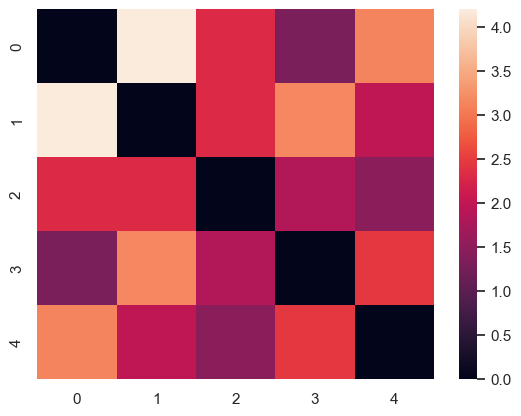

In [63]:
from sklearn.metrics import pairwise_distances

distances_centroids = pairwise_distances(my_model.cluster_centers_)
sns.heatmap(distances_centroids)

# Making radar plot

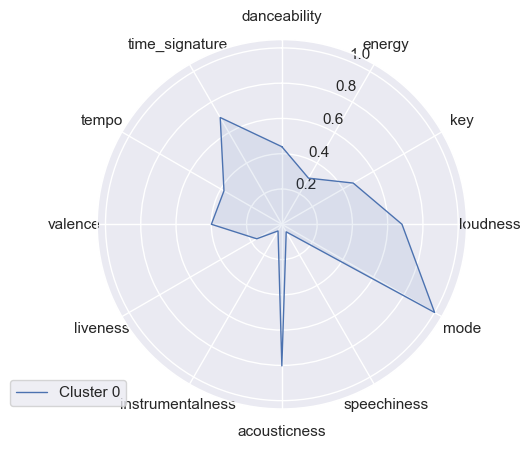

In [68]:
from math import pi
radar_df = clustered_centroids.reset_index().rename(columns={'index':'cluster'})

# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# # Ind2
# values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
# ax.fill(angles, values, 'r', alpha=0.1)

# # Ind3
# values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
# ax.fill(angles, values, 'b', alpha=0.1)

# # Ind4
# values=radar_df.loc[3].drop('cluster').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
# ax.fill(angles, values, 'b', alpha=0.1)

# # Ind3
# values=radar_df.loc[4].drop('cluster').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 4")
# ax.fill(angles, values, 'b', alpha=0.1)

# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


# Show the graph
plt.show()

# Calculating inertia

A for loop to compute the clustering for each value and append the inertia into a list should do the trick. We will use the range() function to generate a list of values between 1 and 30, and input this value to the n_clusters in each iteration:

In [20]:
max_clusters = 30

inertia_list = []

for i in range(1,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(scaled_df_without_clusters)
  inertia_list.append(round(model_loop.inertia_,3))

In [21]:
print(inertia_list)

[1353.846, 960.07, 735.174, 633.362, 566.943, 519.406, 481.797, 458.58, 438.693, 418.868, 404.094, 392.168, 383.886, 368.253, 360.237, 353.117, 345.547, 334.796, 328.972, 321.239, 316.348, 307.447, 304.348, 301.811, 295.518, 291.219, 288.661, 285.479, 281.979]


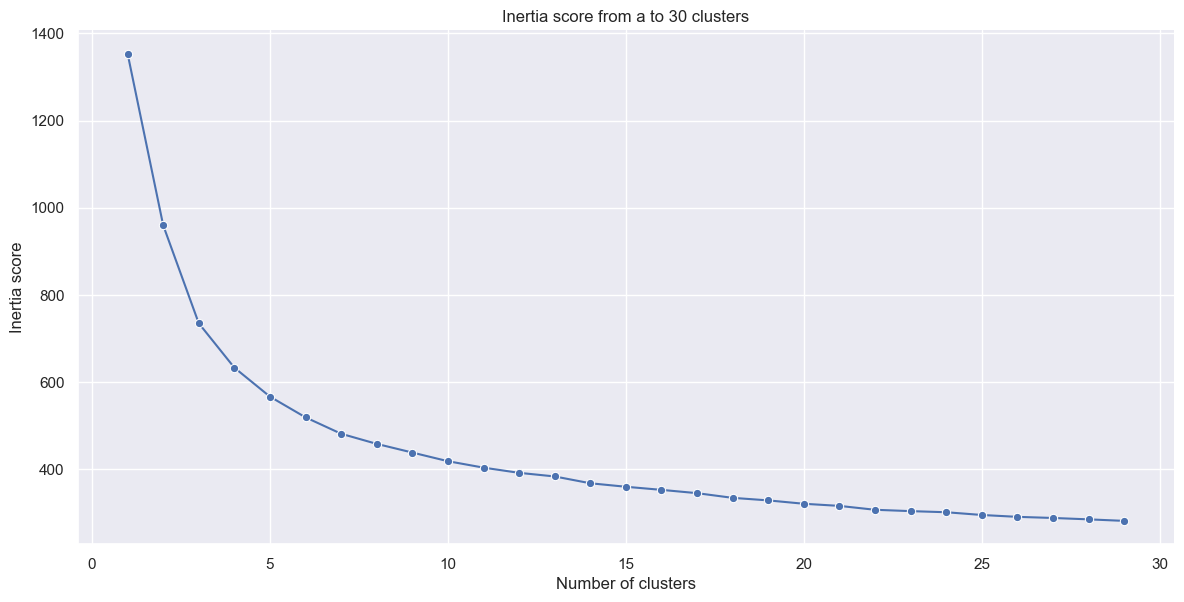

In [22]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(1,max_clusters),y=inertia_list,marker='o',height=6,aspect=2)
    .set(title=f"Inertia score from a to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Inertia score")
);

In this line plot, with the number of clusters (k) represented in the x axis and the inertia represented in the y axis, we are looking for an elbow, as in the moment where the decline stops being sharp to become smooth and gradual:

One might argue that the elbow happens at k=4 or at k=5. It is a pity, since we are looking for a good value between 6 and 30. 

# Silhouette score

To compute the silhouette score, you can use Scikit-Learn’s silhouette_score() function, giving it all the instances in the dataset, and the labels they were assigned:

In [23]:
silhouette_score(scaled_df_without_clusters,my_model.labels_)

0.2768673225897011

In [24]:
max_clusters = 29

silhouette_list = []

for i in range(2,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(scaled_df_without_clusters)
  score = silhouette_score(scaled_df_without_clusters,model_loop.labels_)
  silhouette_list.append(round(score,2))

If you were able to plot the inertia values for all values of K from 1 to 30, you should be able to do the same for the silhouette coefficients. Here, you will not be looking for elbows, but for local maxima.

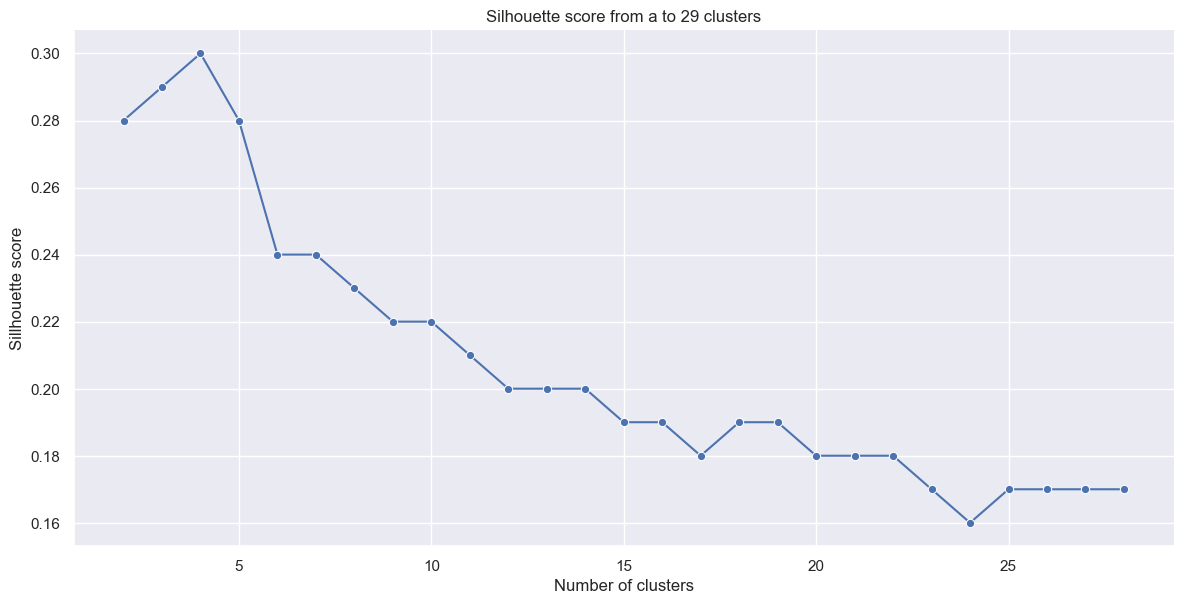

In [25]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(2,max_clusters),y=silhouette_list,marker='o',height=6,aspect=2)
    .set(title=f"Silhouette score from a to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Sillhouette score")
);